In [122]:
import numpy as np

In [123]:
x, y = 1, -2
t_fixe = 1 / 6
epsilon = 10 ** (-10)

In [124]:
def f(x, y):
    return (1 / 4)*(x**4) - (1 / 2)*(x**2) + (1 / 4)*(y**4) - (1 / 2)*(y**2) + 2*x*y

In [125]:
def gradient(x, y):
    return np.array([x**3 - x + 2*y, y**3 - y + 2*x])

In [126]:
def hessienne(x, y):
    return np.array([[3*x**2 - 1, 2], [2, 3*y**2 - 1]])

In [127]:
def dgpf(x, y):
    xk = np.array([x, y])
    points = np.array([[x, y]])
    n_grad = np.linalg.norm(gradient(x, y))
    n = 0
    while n_grad > epsilon:
        xk = xk - t_fixe * gradient(xk[0], xk[1])
        points = np.append(points, [xk], axis=0)
        n_grad = np.linalg.norm(gradient(xk[0], xk[1]))
        n += 1
    return xk, n, f(xk[0], xk[1]), points

In [130]:
xk, n, fk, points = dgpf(x, y)
print("xk = ", xk)
print("n = ", n)
print("fk = ", fk)

xk =  [ 1.73205081 -1.73205081]
n =  58
fk =  -4.5


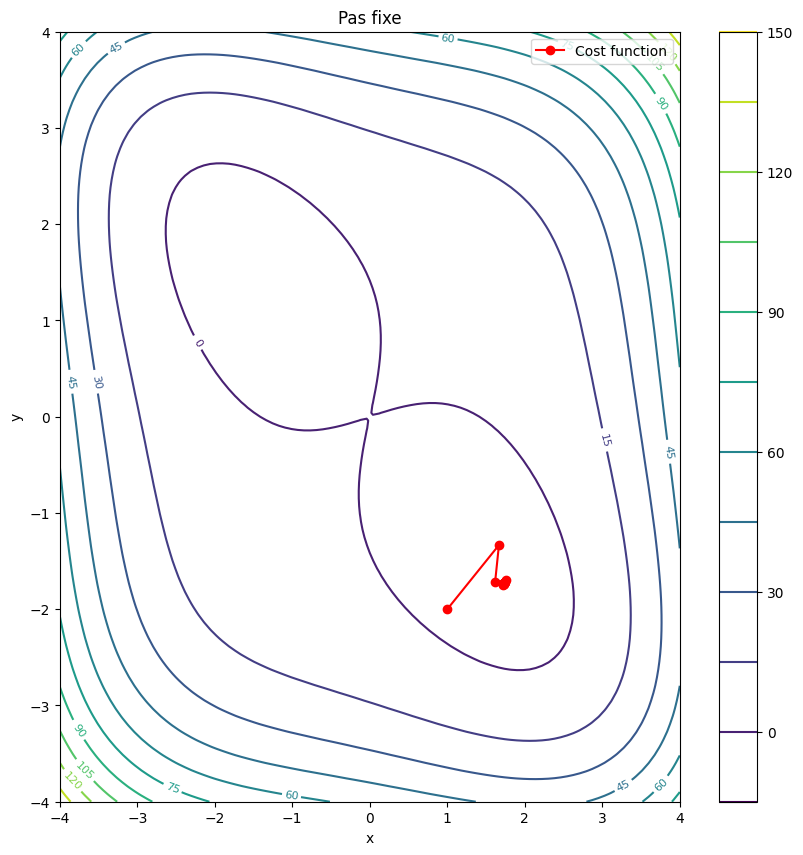

In [147]:
import matplotlib.pyplot as plt

x1 = np.linspace(-4, 4, 100)
y1 = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x1, y1)
Z = f(X, Y)


fig = plt.figure(figsize=(10, 10))
contours = plt.contour(X, Y, Z, 10)
plt.plot(points[:, 0], points[:, 1], 'ro-', label = "Cost function")
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Pas fixe')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

In [ ]:
def dgpo(x, y):
    xk = np.array([x, y])
    n_grad = np.linalg.norm(gradient(x, y))
    n = 0
    while n_grad > epsilon:
        grad = gradient(xk[0], xk[1])
        t_optimal = (grad @ grad) / ((hessienne(xk[0], xk[1]) @ grad) @ grad)
        xk = xk - t_optimal * grad
        n_grad = np.linalg.norm(gradient(xk[0], xk[1]))
        n += 1
    return xk, n

In [ ]:
dgpo(x, y)

In [ ]:
def newton(x, y):
    xk = np.array([x, y])
    n_grad = np.linalg.norm(gradient(x, y))
    n = 0
    while n_grad > epsilon:
        xk = xk - np.linalg.inv(hessienne(xk[0], xk[1])) @ gradient(xk[0], xk[1])
        n_grad = np.linalg.norm(gradient(xk[0], xk[1]))
        n += 1
    return xk, n

In [ ]:
newton(x, y)

In [ ]:
def adaptatif(x, y):
    xk = np.array([x, y])
    n_grad = np.linalg.norm(gradient(x, y))
    n = 0
    while n < 52:
        r = 1
        grad = gradient(xk[0], xk[1])
        xk_r = xk - r * grad
        xk_2r = xk - 2 * r * grad
        while not(f(xk[0], xk[1]) > f(xk_r[0], xk_r[1]) and f(xk_r[0], xk_r[1]) > f(xk_2r[0], xk_2r[1])):
            r /= 2
            xk_r = xk - r * grad
            xk_2r = xk - 2 * r * grad
        t_var = 2 * r
        xk_t = xk - t_var * grad
        xk_t_r = xk - (t_var + r) * grad
        while f(xk_t_r[0], xk_t_r[1]) < f(xk_t[0], xk_t[1]):
            t_var += r
            xk_t = xk - t_var * grad
            xk_t_r = xk - (t_var + r) * grad
        xk = xk - t_var * grad
        n_grad = np.linalg.norm(gradient(xk[0], xk[1]))
        n += 1
    return xk, n

In [ ]:
adaptatif(x, y)